In [1]:
import ee # Google Earth Engine
ee.Authenticate()
ee.Initialize()
sentinel2 = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED");
landsat8 = ee.ImageCollection("LANDSAT/LC08/C02/T1_TOA")
import geemap

mapColor = ['45a248', '1c3da2']
colorcontrast = ['d303fc', '000000']

Enter verification code: 4/1AX4XfWjD-XtAk7v1vjgnG0SXAg4SBJ-qeVNr4c9VeLb6N6-xKODR4Vz64dA

Successfully saved authorization token.


In [2]:
willamette_geometry = ee.Geometry.Polygon(
        [[[-123.17735227170873, 44.27870641979654],
          [-123.17670854154515, 44.27683214434244],
          [-123.17606481138158, 44.27418962165109],
          [-123.17559274259496, 44.27004123588735],
          [-123.17585023466039, 44.26739840782829],
          [-123.17353280607152, 44.26638426783975],
          [-123.17353280607152, 44.2703178040482],
          [-123.17404779020238, 44.2746812627772],
          [-123.17400487485814, 44.27566453269001],
          [-123.17516358915258, 44.27855279291034],
          [-123.175421081218, 44.279136572940985]]]);
willamette_lat = 44.2787
willamette_lon = -123.177
zoom = 15

In [3]:
mississippi_site_number='07289000'
start_date = '2014-10-01'
end_date = '2021-09-30'
mississippi_discharge_cfs_threshold = 1000000
mississippi_geometry = ee.Geometry.Polygon(
        [[[-90.9177845688234, 32.335557854068995],
          [-90.91349303439956, 32.33432498989724],
          [-90.90920149997574, 32.33185921117534],
          [-90.90705573276382, 32.32808789026796],
          [-90.90619742587906, 32.325984585367834],
          [-90.90636908725601, 32.3243164122555],
          [-90.90774237827164, 32.32134263613644],
          [-90.90997397617203, 32.318441297029096],
          [-90.91143309787613, 32.315539864975015],
          [-90.9140938492189, 32.313146113562084],
          [-90.91615378574234, 32.31075229889282],
          [-90.90705573276382, 32.306544834979036],
          [-90.90387999729019, 32.30843096365433],
          [-90.90049373616061, 32.31354165282473],
          [-90.8994637678989, 32.31782132695719],
          [-90.89809047688327, 32.32072268592575],
          [-90.89731800068698, 32.322826113055285],
          [-90.89680301655612, 32.324784432324336],
          [-90.89457141865573, 32.32841083764998],
          [-90.89551555622897, 32.330151460612875],
          [-90.8954297255405, 32.33312494741842],
          [-90.89594470967135, 32.33602581602416],
          [-90.90263950337253, 32.34066701240601],
          [-90.91087924946628, 32.345452996869604]]]);
mississippi_lat = 32.33
mississippi_lon = -90.91

## B3 - Green - reflects more green light, helps find oil on the surface of water, and vegetation

In [4]:
Map = geemap.Map()
image = sentinel2 \
    .filterBounds(willamette_geometry) \
    .filterDate("2015-10-01", "2021-09-30") \
    .sort('CLOUD_COVER') \
    .first()

colors = ['35a155', '000000']

visualization = {
    'bands': ['B3'],
    'min': 0,
    'max': 2000,
    #'palette': colors

};

    
Map.addLayer(image, visualization, 'B3');

Map.setCenter(willamette_lon, willamette_lat, zoom)


Map

Map(center=[44.2787, -123.177], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

## B5 - Visible and Near Infrared (VNIR)  - measures the near infrared, measure plant health more precisely than if we only looked at visible greenness.

In [5]:
Map = geemap.Map()
image = sentinel2 \
    .filterBounds(willamette_geometry) \
    .filterDate("2015-10-01", "2021-09-30") \
    .sort('CLOUD_COVER') \
    .first()

colors = ['ba3d4e', '000000']

visualization = {
    'bands': ['B5'],
    'min': 0,
    'max': 2000,
    #'palette': colors

};

    
Map.addLayer(image, visualization, 'B5');

Map.setCenter(willamette_lon, willamette_lat, zoom)


Map

Map(center=[44.2787, -123.177], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

##  B11 - Short Wave Infrared (SWIR)

In [6]:
Map = geemap.Map()
image = sentinel2 \
    .filterBounds(willamette_geometry) \
    .filterDate("2015-10-01", "2021-09-30") \
    .sort('CLOUD_COVER') \
    .first()

colors = ['c2fff6', '000000']

visualization = {
    'bands': ['B11'],
    'min': 0,
    'max': 2000,

};

    
Map.addLayer(image, visualization, 'B11');

Map.setCenter(willamette_lon, willamette_lat, zoom)


Map

Map(center=[44.2787, -123.177], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

In [7]:
Map = geemap.Map()
image = sentinel2 \
    .filterBounds(willamette_geometry) \
    .filterDate("2015-10-01", "2021-09-30") \
    .sort('CLOUD_COVER') \
    .first()


visualization = {
    'bands': ['B4', 'B3', 'B2'],
    'min': 0,
    'max': 2000,
    'gamma': [0.95, 1.1, 1]

};

    
Map.addLayer(image, visualization, 'natural');

Map.setCenter(willamette_lon, willamette_lat, zoom)


Map

Map(center=[44.2787, -123.177], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

## MNDWI

In [8]:
Map = geemap.Map()
image = sentinel2 \
    .filterBounds(willamette_geometry) \
    .filterDate("2015-10-01", "2021-09-30") \
    .sort('CLOUD_COVER') \
    .first()
    
water = image.normalizedDifference(['B3', 'B11']).gt(0)

Map.addLayer(water, {'min': 0.5, 'max':1, 'palette': mapColor}) 


Map.setCenter(willamette_lon, willamette_lat, zoom)


Map

Map(center=[44.2787, -123.177], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

## NDWI

In [9]:
Map = geemap.Map()
image = sentinel2 \
    .filterBounds(willamette_geometry) \
    .filterDate("2015-10-01", "2021-09-30") \
    .sort('CLOUD_COVER') \
    .first()
    
water = image.normalizedDifference(['B3', 'B5']).gt(0)

Map.addLayer(water, {'min': 0.5, 'max':1, 'palette': mapColor}) 


Map.setCenter(willamette_lon, willamette_lat, zoom)


Map

Map(center=[44.2787, -123.177], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

## Images from individual dates 

In [10]:
def visualImageFromDate(Map, date1, date2):
    image = sentinel2 \
    .filterBounds(willamette_geometry) \
    .filterDate(date1, date2) \
    .sort('CLOUD_COVER') \
    .first()


    visualization = {
        'bands': ['B4', 'B3', 'B2'],
        'min': 0,
        'max': 2000,
        'gamma': [0.95, 1.1, 1]

    };


    Map.addLayer(image, visualization, 'natural');

    Map.setCenter(willamette_lon, willamette_lat, zoom)
    

In [11]:
Map = geemap.Map()

visualImageFromDate(Map, '2020-12-28', '2020-12-29')

Map

Map(center=[44.2787, -123.177], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

In [12]:
Map = geemap.Map()

visualImageFromDate(Map, '2019-05-01', '2019-05-02')

Map

Map(center=[44.2787, -123.177], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

In [13]:
Map = geemap.Map()

visualImageFromDate(Map, '2019-04-28', '2019-04-29')

Map

Map(center=[44.2787, -123.177], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

In [14]:
Map = geemap.Map()

visualImageFromDate(Map, '2019-03-02', '2019-03-03')

Map

Map(center=[44.2787, -123.177], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

## Cross Section of Willamette

In [15]:
import nldi_xstool
import geopandas

%matplotlib inline
from nldi_xstool.XSGen import XSGen
from nldi_xstool.ancillary import query_dems_bbox
import py3dep
from pynhd import NLDI, NHDPlusHR, WaterData
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import dataretrieval.nwis as nwis

/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [16]:
# https://waterdata.usgs.gov/nwis/inventory?agency_code=USGS&site_no=11114495

gagebasin = NLDI().get_basins("14166000").to_crs('epsg:3857')
gageloc = NLDI().getfeature_byid("nwissite", "USGS-14166000").to_crs('epsg:3857')


<AxesSubplot:>

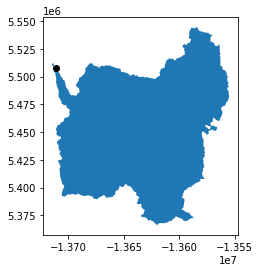

In [17]:
ax = plt.subplot(111)
gagebasin.plot(ax=ax)
gageloc.plot(ax=ax, color='black')

In [18]:
gagebasin = NLDI().get_basins("14166000").to_crs('epsg:3857')
gageloc = NLDI().getfeature_byid("nwissite", "USGS-14166000").to_crs('epsg:3857')
cid = gageloc.comid.values.astype(str)
print(cid,gageloc.comid.values.astype(int)[0], cid[0]) 
# strmseg_basin = NLDI().getfeature_byid("comid", cid[0], basin=True).to_crs('epsg:3857')
strmseg_loc = NLDI().getfeature_byid("comid", cid[0]).to_crs('epsg:3857')

['23763337'] 23763337 23763337


10


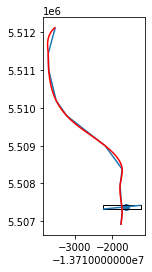

In [19]:
# print(geomfeat.head(), geom2afeat.head())
xs = XSGen(point=gageloc, cl_geom=strmseg_loc, ny=101, width=1000, tension=0.5)
xs_line = xs.get_xs()
ax = plt.subplot(111)
gageloc.plot(ax=ax)
strmseg_loc.plot(ax=ax)
xs_line.plot(ax=ax)
xs.get_strm_seg_spline().plot(ax=ax, colors='r')
xs_line.envelope.plot(ax=ax, facecolor="none", edgecolor='black')
plt.show()

In [20]:
xs_line_geom = xs_line.to_crs('epsg:4326')
print(xs_line_geom)
bbox = xs_line_geom.geometry[0].envelope.bounds
print(bbox)
query = query_dems_bbox(bbox)
print(query)
bbox = xs_line.geometry[0].bounds
width = abs(bbox[0]-bbox[2])
height = abs(bbox[1]-bbox[3])
print(width, height)
bb = xs_line.buffer(100)
bb.geometry[0].bounds
bb1 = (xs_line.total_bounds) - ((100., 100., -100., -100.))
tuple(bb1)

            name                                           geometry
0  cross-section  LINESTRING (-123.17025 44.27064, -123.17034 44...
(-123.1791936043453, 44.27000744830729, -123.17025388014292, 44.27063918773215)
{'res_1m': False, 'res_3m': True, 'res_5m': False, 'res_10m': True, 'res_30m': True, 'res_60m': False}
995.165546040982 98.21168960258365


(-13712345.108361779,
 5507221.979270949,
 -13711149.942815738,
 5507520.190960552)

            name                                           geometry
0  cross-section  LINESTRING (-13711249.943 5507420.191, -137112...


(-13713842.391115215,
 -13711149.942815738,
 5506640.111621479,
 5512401.002302254)

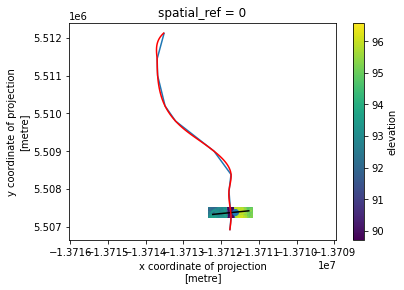

In [21]:
#Buffer bounding box of cross-section otherwise interpolation with elevation below returns nans near end points
xs_line_geom = xs_line.to_crs('epsg:3857')
print(xs_line_geom)
t1 = (xs_line_geom.total_bounds) + ((-100.,-100.,100., 100.))
dem = py3dep.get_map("DEM", tuple(t1), resolution=10, geo_crs="EPSG:3857", crs="epsg:3857")

ax = plt.subplot(111)
strmseg_loc.plot(ax=ax)
xs_line_geom.plot(ax=ax, colors='black')
xs.get_strm_seg_spline().plot(ax=ax, colors='r')
xs_line.envelope.plot(ax=ax, facecolor="none", edgecolor='black')
dem.plot(ax=ax)
gageloc.plot(ax=ax)
ax.axis('equal')
# plt.tight_layout()

<class 'xarray.core.dataarray.DataArray'>


/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Flo

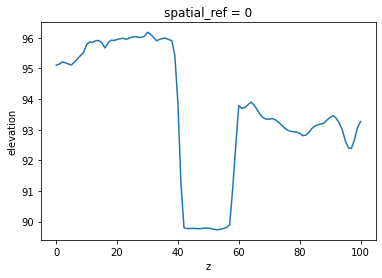

In [22]:
x,y = xs.get_xs_points()
dsx = xr.DataArray(x, dims='z')
dsy = xr.DataArray(y, dims='z')
dsi = dem.interp(x=('z',x), y=('z',y))
dsi.plot()
print(type(dsi))